# RED WINE QUALITY PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
wine_df = pd.read_csv(r"C:\Users\Prajyot Lad\Desktop\csv\winequality-red.csv")

In [3]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)

In [9]:
#o-bad,1-good
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
wine_df['quality'] = le.fit_transform(wine_df['quality'])

In [10]:
wine_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


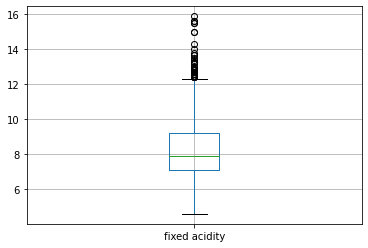

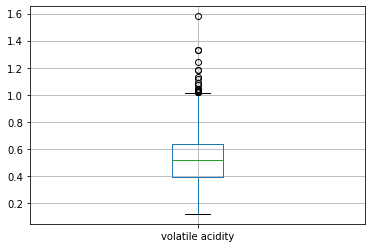

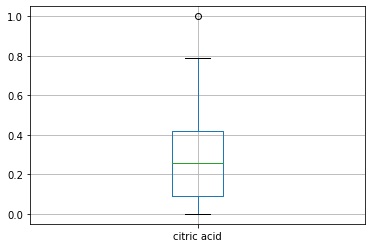

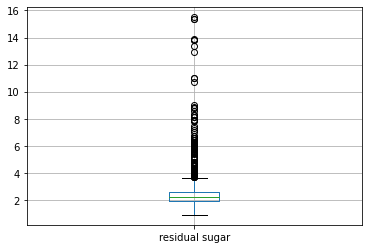

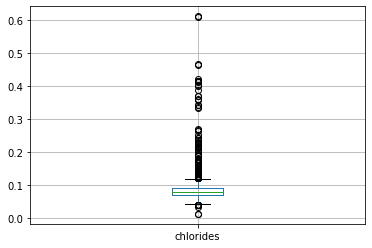

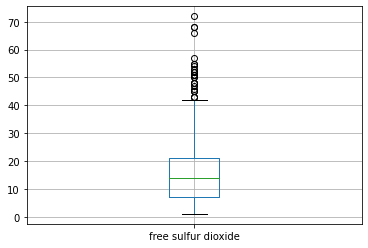

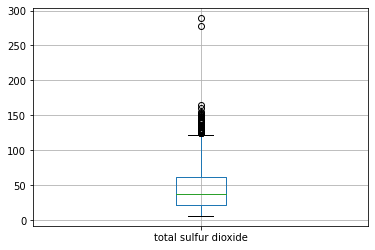

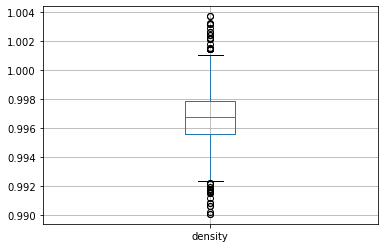

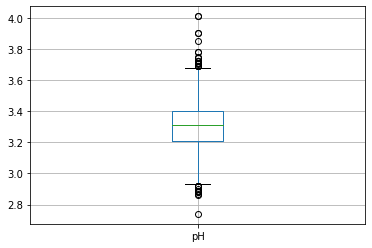

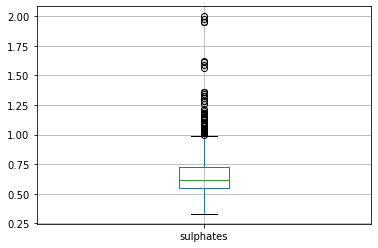

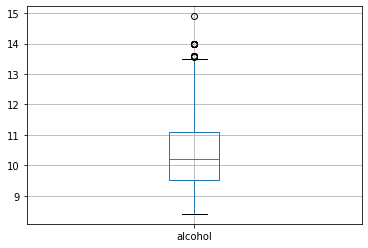

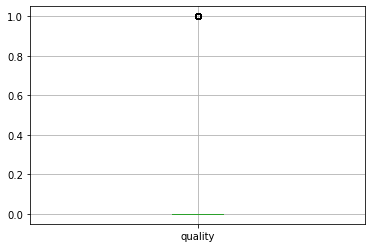

In [11]:
#Assumption 1: There should be no outliers in the data. Check using boxplot.
for i in wine_df.columns:
    wine_df.boxplot(column=i)
    plt.show()

In [12]:
wine_df.rename(columns = {"fixed acidity":'fixed_acidity',"volatile acidity":"volatile_acidity","citric acid":"citric_acid","residual sugar":"residual_sugar",
                          "free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"},inplace = True)

In [13]:
wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## outlier treatment

(1550, 12)
(49, 12)
3.95
8
(1599, 12)


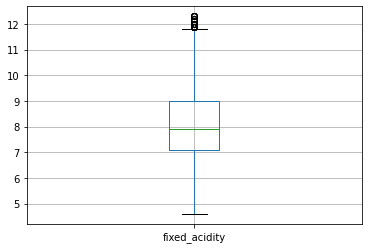

In [25]:
#for value in colname:
q1 = wine_df['fixed_acidity'].quantile(0.25) #first quartile value
q3 = wine_df['fixed_acidity'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


wine_df_include = wine_df.loc[(wine_df['fixed_acidity'] >= low) & \
                  (wine_df['fixed_acidity'] <= high)]
wine_df_exclude = wine_df.loc[(wine_df['fixed_acidity'] < low) | (wine_df['fixed_acidity'] > high)]

print(wine_df_include.shape)
print(wine_df_exclude.shape)

print(low)

fixed_acidity_mean=int(wine_df_include.fixed_acidity.mean())   #finding the mean of the acceptable range
print(fixed_acidity_mean)

wine_df_exclude.fixed_acidity=fixed_acidity_mean

#getting back the original shape of df
wine_df_rev=pd.concat([wine_df_include,wine_df_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev.shape)
wine_df_rev.boxplot(column="fixed_acidity")
plt.show()

(1580, 12)
(19, 12)
0.015000000000000013
0
(1599, 12)


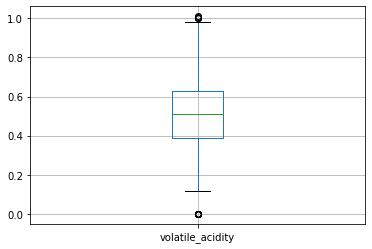

In [26]:
q1 = wine_df_rev['volatile_acidity'].quantile(0.25) #first quartile value
q3 = wine_df_rev['volatile_acidity'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


wine_df_rev_include = wine_df_rev.loc[(wine_df_rev['volatile_acidity'] >= low) & \
                  (wine_df_rev['volatile_acidity'] <= high)]
wine_df_rev_exclude = wine_df_rev.loc[(wine_df['volatile_acidity'] < low) | (wine_df_rev['volatile_acidity'] > high)]

print(wine_df_rev_include.shape)
print(wine_df_rev_exclude.shape)

print(low)

volatile_acidity_mean=int(wine_df_rev_include.volatile_acidity.mean())   #finding the mean of the acceptable range
print(volatile_acidity_mean)

wine_df_rev_exclude.volatile_acidity=volatile_acidity_mean

#getting back the original shape of df
wine_df_rev1=pd.concat([wine_df_rev_include,wine_df_rev_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev1.shape)
wine_df_rev1.boxplot(column = "volatile_acidity")
plt.show()

(1444, 12)
(155, 12)
0.8499999999999996
2
(1599, 12)


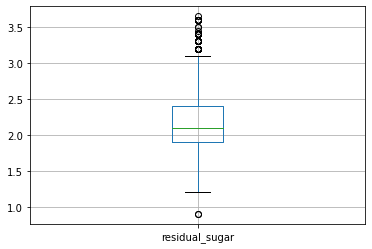

In [27]:
q1 = wine_df_rev1['residual_sugar'].quantile(0.25) #first quartile value
q3 = wine_df_rev1['residual_sugar'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


wine_df_rev1_include = wine_df_rev1.loc[(wine_df_rev1['residual_sugar'] >= low) & \
                  (wine_df_rev['residual_sugar'] <= high)]
wine_df_rev1_exclude = wine_df_rev1.loc[(wine_df_rev1['residual_sugar'] < low) | (wine_df_rev1['residual_sugar'] > high)]

print(wine_df_rev1_include.shape)
print(wine_df_rev1_exclude.shape)

print(low)

residual_sugar_mean=int(wine_df_rev1_include.residual_sugar.mean())   #finding the mean of the acceptable range
print(residual_sugar_mean)

wine_df_rev1_exclude.residual_sugar=residual_sugar_mean

#getting back the original shape of df
wine_df_rev2=pd.concat([wine_df_rev1_include,wine_df_rev1_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev2.shape)
wine_df_rev2.boxplot(column = "residual_sugar")
plt.show()

(1487, 12)
(112, 12)
0.04000000000000002
0
(1599, 12)


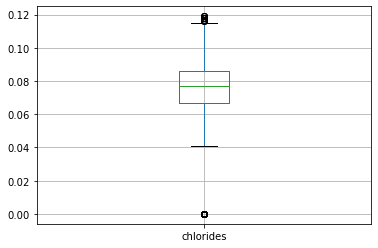

In [28]:
q1 = wine_df_rev2['chlorides'].quantile(0.25) #first quartile value
q3 = wine_df_rev2['chlorides'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


wine_df_rev2_include = wine_df_rev2.loc[(wine_df_rev2['chlorides'] >= low) & \
                  (wine_df_rev2['chlorides'] <= high)]
wine_df_rev2_exclude = wine_df_rev2.loc[(wine_df_rev2['chlorides'] < low) | (wine_df_rev2['chlorides'] > high)]

print(wine_df_rev2_include.shape)
print(wine_df_rev2_exclude.shape)

print(low)

chlorides_mean=int(wine_df_rev2_include.chlorides.mean())   #finding the mean of the acceptable range
print(chlorides_mean)

wine_df_rev2_exclude.chlorides=chlorides_mean

#getting back the original shape of df
wine_df_rev3=pd.concat([wine_df_rev2_include,wine_df_rev2_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev3.shape)
wine_df_rev3.boxplot(column = "chlorides")
plt.show()

(1569, 12)
(30, 12)
-14.0
15
(1599, 12)


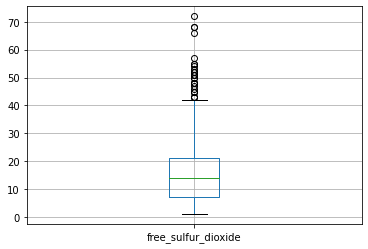

In [29]:
q1 = wine_df_rev3['free_sulfur_dioxide'].quantile(0.25) #first quartile value
q3 = wine_df_rev3['free_sulfur_dioxide'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


wine_df_rev3_include = wine_df_rev3.loc[(wine_df_rev3['free_sulfur_dioxide'] >= low) & \
                  (wine_df_rev3['free_sulfur_dioxide'] <= high)]
wine_df_rev3_exclude = wine_df_rev3.loc[(wine_df_rev3['free_sulfur_dioxide'] < low) | (wine_df_rev3['free_sulfur_dioxide'] > high)]

print(wine_df_rev3_include.shape)
print(wine_df_rev3_exclude.shape)

print(low)

free_sulfur_dioxide_mean=int(wine_df_rev3_include.free_sulfur_dioxide.mean())   #finding the mean of the acceptable range
print(free_sulfur_dioxide_mean)

wine_df_rev3_free_sulfur_dioxide=free_sulfur_dioxide_mean

#getting back the original shape of df
wine_df_rev4=pd.concat([wine_df_rev3_include,wine_df_rev3_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev4.shape)
wine_df_rev4.boxplot(column = "free_sulfur_dioxide")
plt.show()

(1544, 12)
(55, 12)
-38.0
42
(1599, 12)


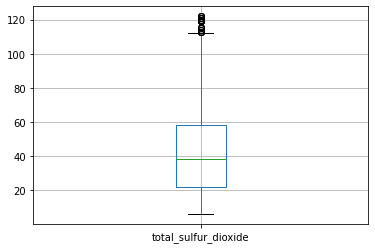

In [30]:
q1 = wine_df_rev4['total_sulfur_dioxide'].quantile(0.25) #first quartile value
q3 = wine_df_rev4['total_sulfur_dioxide'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


wine_df_rev4_include = wine_df_rev4.loc[(wine_df_rev4['total_sulfur_dioxide'] >= low) & \
                  (wine_df_rev4['total_sulfur_dioxide'] <= high)]
wine_df_rev4_exclude = wine_df_rev4.loc[(wine_df_rev4['total_sulfur_dioxide'] < low) | (wine_df_rev4['total_sulfur_dioxide'] > high)]

print(wine_df_rev4_include.shape)
print(wine_df_rev4_exclude.shape)

print(low)

total_sulfur_dioxide_mean=int(wine_df_rev4_include.total_sulfur_dioxide.mean())   #finding the mean of the acceptable range
print(total_sulfur_dioxide_mean)

wine_df_rev4_exclude.total_sulfur_dioxide=total_sulfur_dioxide_mean

#getting back the original shape of df
wine_df_rev5=pd.concat([wine_df_rev4_include,wine_df_rev4_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev5.shape)
wine_df_rev5.boxplot(column = "total_sulfur_dioxide")
plt.show()

(1554, 12)
(45, 12)
0.9922475000000001
0
(1599, 12)


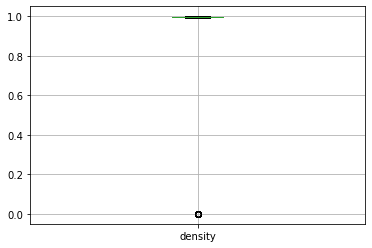

In [31]:
q1 = wine_df_rev5['density'].quantile(0.25) #first quartile value
q3 = wine_df_rev5['density'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

wine_df_rev5_include = wine_df_rev5.loc[(wine_df_rev5['density'] >= low) & \
                  (wine_df_rev5['density'] <= high)]
wine_df_rev5_exclude = wine_df_rev5.loc[(wine_df_rev5['density'] < low) | (wine_df_rev5['density'] > high)]

print(wine_df_rev5_include.shape)
print(wine_df_rev5_exclude.shape)

print(low)


density_mean=int(wine_df_rev5_include.density.mean())   #finding the mean of the acceptable range
print(density_mean)

wine_df_rev5_exclude.density=density_mean

#getting back the original shape of df
wine_df_rev6=pd.concat([wine_df_rev5_include,wine_df_rev5_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev6.shape)
wine_df_rev6.boxplot(column = "density")
plt.show()

(1564, 12)
(35, 12)
2.925
3
(1599, 12)


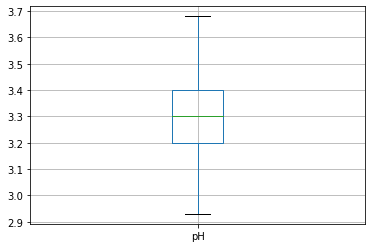

In [32]:
q1 = wine_df_rev6['pH'].quantile(0.25) #first quartile value
q3 = wine_df_rev6['pH'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

wine_df_rev6_include = wine_df_rev6.loc[(wine_df_rev6['pH'] >= low) & \
                  (wine_df_rev6['pH'] <= high)]
wine_df_rev6_exclude = wine_df_rev6.loc[(wine_df_rev6['pH'] < low) | (wine_df_rev6['pH'] > high)]

print(wine_df_rev6_include.shape)
print(wine_df_rev6_exclude.shape)

print(low)


pH_mean=int(wine_df_rev6_include.pH.mean())   #finding the mean of the acceptable range
print(pH_mean)

wine_df_rev6_exclude.pH=pH_mean

#getting back the original shape of df
wine_df_rev7=pd.concat([wine_df_rev6_include,wine_df_rev6_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev7.shape)
wine_df_rev7.boxplot(column = "pH")
plt.show()

(1540, 12)
(59, 12)
0.28000000000000014
0
(1599, 12)


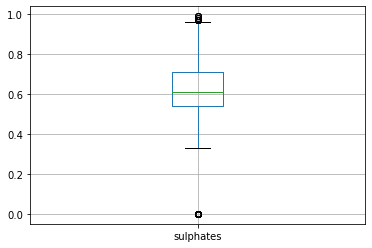

In [33]:
q1 = wine_df_rev7['sulphates'].quantile(0.25) #first quartile value
q3 = wine_df_rev7['sulphates'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

wine_df_rev7_include = wine_df_rev7.loc[(wine_df_rev7['sulphates'] >= low) & \
                  (wine_df_rev7['sulphates'] <= high)]
wine_df_rev7_exclude = wine_df_rev7.loc[(wine_df_rev7['sulphates'] < low) | (wine_df_rev7['sulphates'] > high)]

print(wine_df_rev7_include.shape)
print(wine_df_rev7_exclude.shape)

print(low)


sulphates_mean=int(wine_df_rev7_include.sulphates.mean())   #finding the mean of the acceptable range
print(sulphates_mean)

wine_df_rev7_exclude.sulphates=sulphates_mean

#getting back the original shape of df
wine_df_rev8=pd.concat([wine_df_rev7_include,wine_df_rev7_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev8.shape)
wine_df_rev8.boxplot(column = "sulphates")
plt.show()

(1586, 12)
(13, 12)
7.1000000000000005
10
(1599, 12)


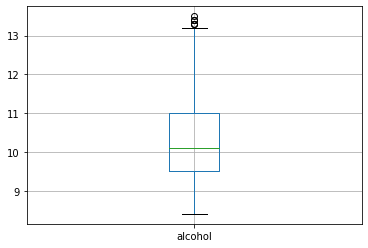

In [35]:
q1 = wine_df_rev8['alcohol'].quantile(0.25) #first quartile value
q3 = wine_df_rev8['alcohol'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

wine_df_rev8_include = wine_df_rev8.loc[(wine_df_rev8['alcohol'] >= low) & \
                  (wine_df_rev8['alcohol'] <= high)]
wine_df_rev8_exclude = wine_df_rev8.loc[(wine_df_rev8['alcohol'] < low) | (wine_df_rev8['alcohol'] > high)]

print(wine_df_rev8_include.shape)
print(wine_df_rev8_exclude.shape)

print(low)

alcohol_mean=int(wine_df_rev8_include.alcohol.mean())   #finding the mean of the acceptable range
print(alcohol_mean)

wine_df_rev8_exclude.alcohol=alcohol_mean

#getting back the original shape of df
wine_df_rev9=pd.concat([wine_df_rev8_include,wine_df_rev8_exclude],axis=0) #concatenating both dfs to get 
#the original shape
print(wine_df_rev9.shape)
wine_df_rev9.boxplot(column = "alcohol")
plt.show()

In [37]:
X = wine_df_rev9.values[:,0:-1]
Y = wine_df_rev9.values[:,-1]

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[-0.50845786  1.06146795 -1.39147228 ...  1.42387769 -0.31367918
  -0.97407965]
 [-0.24000017  2.09073336 -1.39147228 ... -0.69838809  0.39743567
  -0.58097731]
 [-0.24000017  1.40455642 -1.18607043 ... -0.28762697  0.21965696
  -0.58097731]
 ...
 [-2.11920399 -0.53961158 -0.15906119 ... -2.06759182  0.7529931
  -0.38442614]
 [-2.18631841 -0.53961158 -1.39147228 ... -2.06759182  0.7529931
  -0.38442614]
 [-2.11920399 -0.76833722 -1.34012182 ... -2.06759182  0.81225267
  -0.38442614]]


In [40]:
Y=Y.astype(int)

In [41]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10) 

In [43]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

print(list(zip(wine_df_rev8.columns[:-1],classifier.coef_.ravel())))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print(classification_report(Y_test,Y_pred))
print("Classification report: ")

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[397  10]
 [ 61  12]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       407
           1       0.55      0.16      0.25        73

    accuracy                           0.85       480
   macro avg       0.71      0.57      0.59       480
weighted avg       0.82      0.85      0.82       480

Classification report: 
Accuracy of the model:  0.8520833333333333


In [45]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[8.97547537e-01 1.02452463e-01]
 [9.48028690e-01 5.19713096e-02]
 [9.94329675e-01 5.67032477e-03]
 [9.36245018e-01 6.37549819e-02]
 [7.32413287e-01 2.67586713e-01]
 [8.78916175e-01 1.21083825e-01]
 [9.49550615e-01 5.04493854e-02]
 [6.18333175e-01 3.81666825e-01]
 [9.84544014e-01 1.54559863e-02]
 [6.27906193e-01 3.72093807e-01]
 [9.94970707e-01 5.02929333e-03]
 [5.30766581e-01 4.69233419e-01]
 [9.75622416e-01 2.43775835e-02]
 [9.30084874e-01 6.99151264e-02]
 [9.75409822e-01 2.45901784e-02]
 [9.93479507e-01 6.52049286e-03]
 [9.99552894e-01 4.47106476e-04]
 [9.93042588e-01 6.95741176e-03]
 [9.49011771e-01 5.09882287e-02]
 [7.11428059e-01 2.88571941e-01]
 [9.98252932e-01 1.74706759e-03]
 [9.97534617e-01 2.46538278e-03]
 [5.28387647e-01 4.71612353e-01]
 [9.91201263e-01 8.79873749e-03]
 [8.35608767e-01 1.64391233e-01]
 [8.79887956e-01 1.20112044e-01]
 [9.73565553e-01 2.64344472e-02]
 [7.83029126e-01 2.16970874e-01]
 [9.91370198e-01 8.62980191e-03]
 [9.67760765e-01 3.22392347e-02]
 [9.920125

In [52]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test, y_pred_class))

[[394  13]
 [ 57  16]]
Accuracy of the model:  0.8541666666666666
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       407
           1       0.55      0.22      0.31        73

    accuracy                           0.85       480
   macro avg       0.71      0.59      0.62       480
weighted avg       0.82      0.85      0.83       480



In [54]:
#ROC
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

0.8430211032950758


In [55]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.8430211032950758


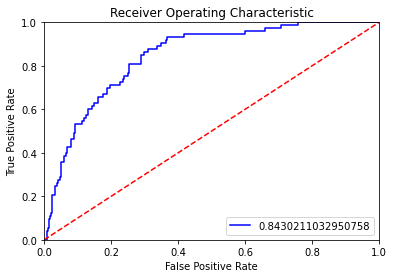

In [56]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


In [57]:
#2]Decision Tree
#Model Building(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DT.fit(X_train,Y_train)
Y_pred=model_DT.predict(X_test)
print(Y_pred)

[1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print(classification_report(Y_test,Y_pred))
print("Classification report: ")

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[385  22]
 [ 33  40]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       407
           1       0.65      0.55      0.59        73

    accuracy                           0.89       480
   macro avg       0.78      0.75      0.76       480
weighted avg       0.88      0.89      0.88       480

Classification report: 
Accuracy of the model:  0.8854166666666666


In [60]:
print(list(zip(wine_df_rev8.columns,model_DT.feature_importances_)))

[('fixed_acidity', 0.06165989473467347), ('volatile_acidity', 0.10762007789133862), ('citric_acid', 0.07443543251009445), ('residual_sugar', 0.028461594691857835), ('chlorides', 0.08609532968510661), ('free_sulfur_dioxide', 0.05808611131241908), ('total_sulfur_dioxide', 0.09069373516195806), ('density', 0.08254997317701779), ('pH', 0.05123636816056491), ('sulphates', 0.17868538839725365), ('alcohol', 0.1804760942777154)]


In [68]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print(classification_report(Y_test,Y_pred))
print("Classification report: ")

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[401   6]
 [ 36  37]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       407
           1       0.86      0.51      0.64        73

    accuracy                           0.91       480
   macro avg       0.89      0.75      0.79       480
weighted avg       0.91      0.91      0.90       480

Classification report: 
Accuracy of the model:  0.9125


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting=GradientBoostingClassifier(n_estimators=71,random_state=10)
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print(classification_report(Y_test,Y_pred))
print("Classification report: ")

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[396  11]
 [ 48  25]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       407
           1       0.69      0.34      0.46        73

    accuracy                           0.88       480
   macro avg       0.79      0.66      0.69       480
weighted avg       0.86      0.88      0.86       480

Classification report: 
Accuracy of the model:  0.8770833333333333
